In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import seaborn as sb

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
chromConvert = {
               'chr_05': 0, 
               'chr_5_p14_deletion': 1
               }

In [3]:
chromConvert_reverse = {
                0: 'chr_05',
                1: 'chr_5_p14_deletion'
               }

In [4]:
label = ['chr_05', 'chr_5_p14_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

# Load test and predict values

In [5]:
y_test_all = []
y_predict_all = []
y_predict_filtered_all = []

In [6]:
for iterationNumber in range(5):
    with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_test:
        y_test_all.append(np.load(f_y_test))
        
    with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict:
        y_predict_all.append(np.load(f_y_predict))                             
                        
    with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict_filtered:
        y_predict_filtered_all.append(np.load(f_y_predict_filtered))

In [7]:
y_predict_all[0].shape

(57, 2)

In [8]:
y_predict_all

[array([[9.9999809e-01, 1.0857953e-09],
        [1.0182521e-04, 9.9994767e-01],
        [9.9999499e-01, 5.3533995e-09],
        [9.9998307e-01, 1.0322510e-08],
        [9.7330350e-01, 8.0917351e-04],
        [9.9999988e-01, 9.5494966e-12],
        [9.9051172e-01, 4.6562636e-04],
        [9.9994683e-01, 1.4003732e-07],
        [9.9981993e-01, 1.6865775e-06],
        [9.9999201e-01, 1.8969532e-08],
        [9.9999845e-01, 9.4204811e-10],
        [9.9999845e-01, 6.1877259e-10],
        [9.9994290e-01, 7.0529573e-08],
        [9.9990594e-01, 3.8022358e-07],
        [9.9999738e-01, 3.3660970e-09],
        [9.9999940e-01, 4.0559586e-10],
        [9.9996650e-01, 1.0401471e-07],
        [9.9985993e-01, 4.4490596e-07],
        [9.9999821e-01, 1.1084426e-09],
        [3.4540835e-01, 3.2899392e-01],
        [4.0193386e-02, 7.9977041e-01],
        [9.9999714e-01, 2.9466436e-09],
        [9.9999988e-01, 1.2828701e-11],
        [9.9996769e-01, 6.5017538e-08],
        [9.9999571e-01, 2.6194849e-09],


In [9]:
y_test_concatenate_list = []
y_predict_concatenate_list = []
y_predict_filtered_concatenate_list = []

In [10]:
for i in range(5):
    y_test_concatenate_list.extend(list(y_test_all[i]))
    y_predict_concatenate_list.extend(list(y_predict_all[i]))
    y_predict_filtered_concatenate_list.extend(list(y_predict_filtered_all[i]))

In [11]:
y_predict_all[0].shape

(57, 2)

In [12]:
label_convert

['chr_05', 'chr_5_p14_deletion']

In [13]:
len(y_test_concatenate_list)

277

In [14]:
len(y_predict_filtered_concatenate_list)

277

In [15]:
len(y_predict_concatenate_list)

277

# Classification Report

## Accuracy

In [16]:
acc = accuracy_score(y_test_concatenate_list, y_predict_filtered_concatenate_list, normalize=True, sample_weight=None)
print('Accuracy is ', acc)

Accuracy is  0.9133574007220217


## Precision, Recall, and F1

In [17]:
performanceReport = classification_report(y_test_concatenate_list, y_predict_filtered_concatenate_list, 
                                          target_names=label_convert)


print(performanceReport)

                    precision    recall  f1-score   support

            chr_05       0.94      0.95      0.94       201
chr_5_p14_deletion       0.85      0.83      0.84        76

         micro avg       0.91      0.91      0.91       277
         macro avg       0.89      0.89      0.89       277
      weighted avg       0.91      0.91      0.91       277



## Confusion Matrix

In [18]:
cm = np.array(confusion_matrix(y_test_concatenate_list, y_predict_filtered_concatenate_list))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Combination_of_CrossValidation_KaryoType_CNN.csv')
confusion

,chr_05,chr_5_p14_deletion
chr_05,190,11
chr_5_p14_deletion,13,63


### 3.10.4 Rate of Confusion Matrix

### 3.10.5 Recall (查全率)，(Sensitivity Rate)

In [19]:
subtotal = [0] * 2  
for item in y_test_concatenate_list:
    subtotal[item] = subtotal[item] + 1

#### predict number divided by y test

In [20]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [21]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Recall_Integration_CNN.csv')
confusion_r

,chr_05,chr_5_p14_deletion
chr_05,0.945274,0.054726
chr_5_p14_deletion,0.171053,0.828947


### 3.10.6 Precision (查准率）

In [22]:
subtotal_predict = [0] * 2 
for item in y_predict_filtered_concatenate_list:
    subtotal_predict[item] = subtotal_predict[item] + 1

#### predict number divided by y predicted

In [23]:
cm_p = []
for i in range(2):
    cm_p.append(cm[:,i]/subtotal_predict[i])

In [24]:
confusion_p = pd.DataFrame(cm_p, index=label_convert,
                        columns=label_convert)
confusion_p.to_csv('ConfusionMatrix_Precision_Integration_CNN.csv')
confusion_p

,chr_05,chr_5_p14_deletion
chr_05,0.935961,0.064039
chr_5_p14_deletion,0.148649,0.851351


#### Heat Map: Number

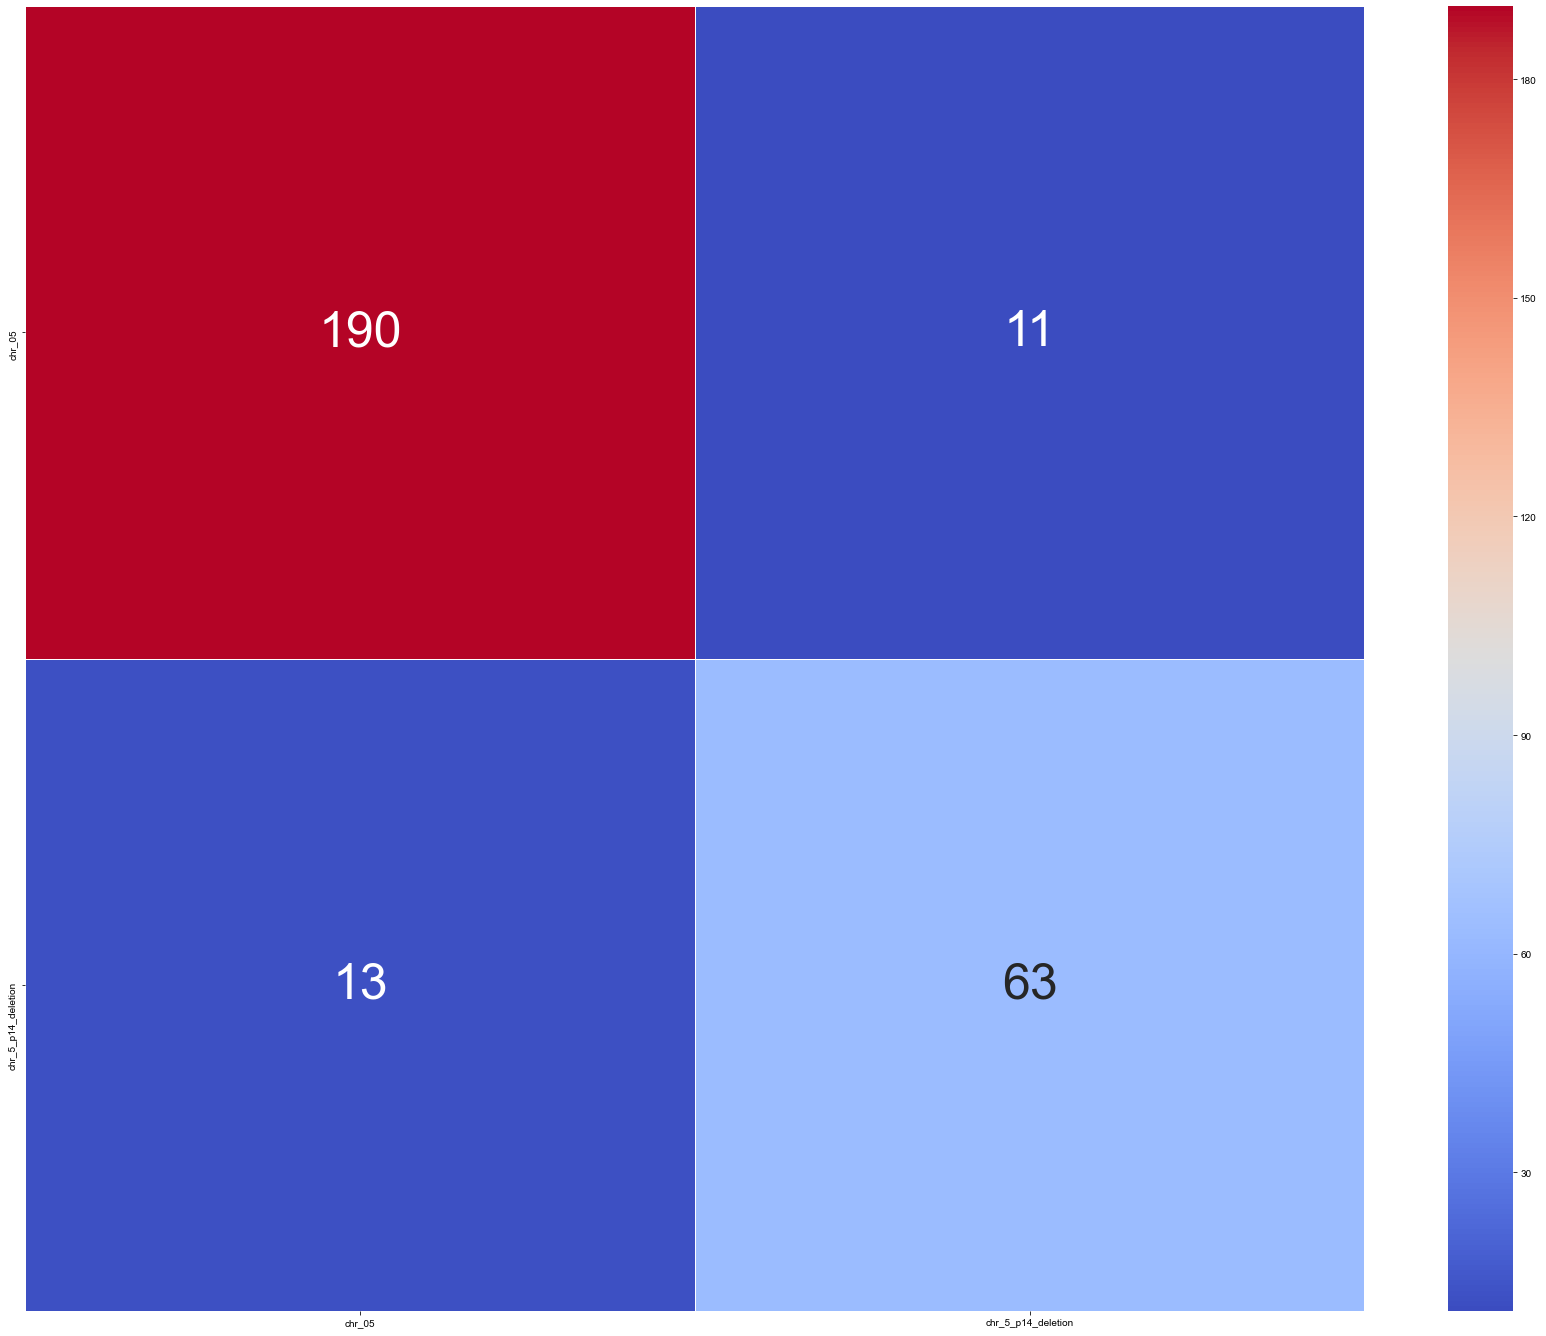

In [25]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  fmt='g',# It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

#### Heat Map of Recall: Rate (important!!!)

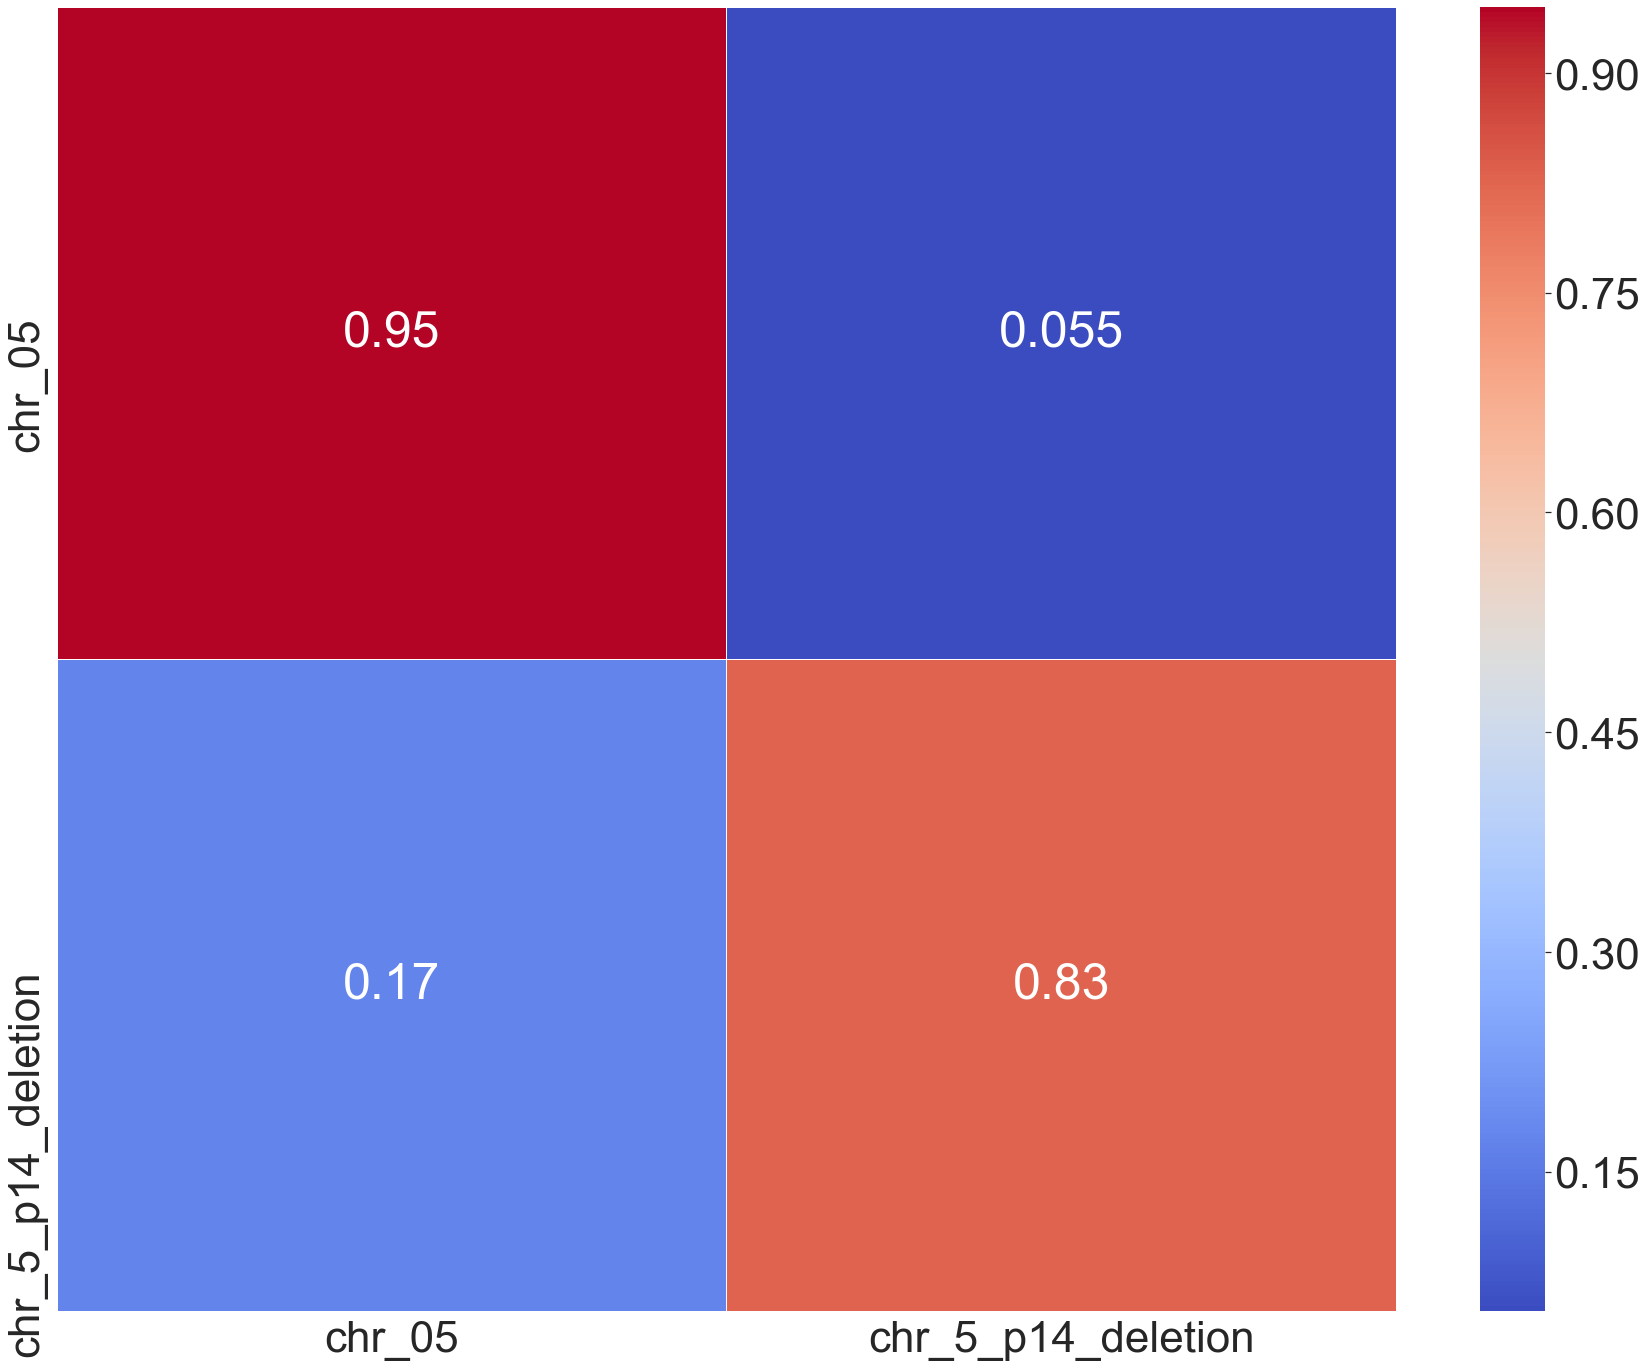

In [26]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

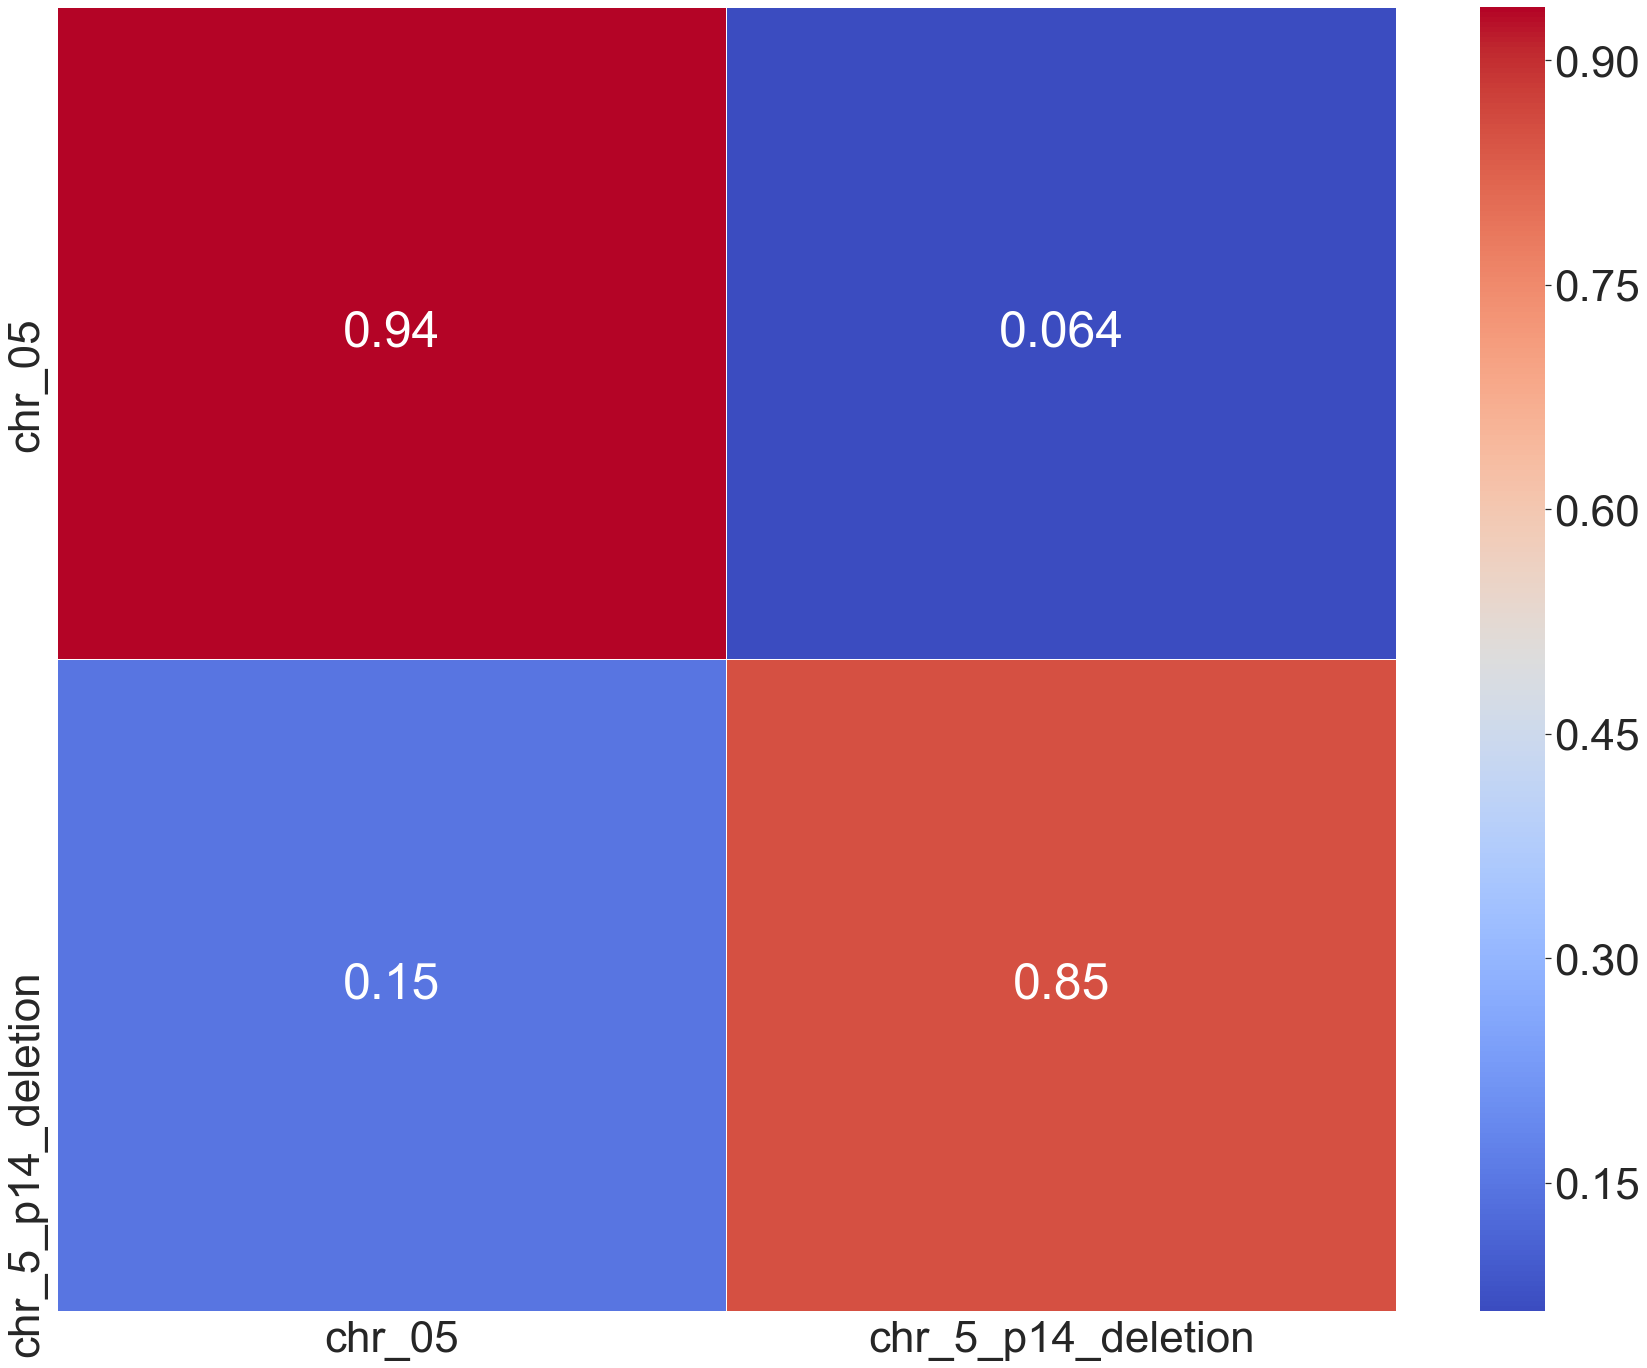

In [27]:
plt.figure(figsize=(30, 24))
heat_map_p = sb.heatmap(confusion_p, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

In [28]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Combination.png', dpi=400)

In [29]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Recall_Combination.png', dpi=400)

In [30]:
fig_p = heat_map_p.get_figure()    
fig_p.savefig('Heatmap_Precision_Combination.png', dpi=400)

# ROC Curve

In [31]:
y_predict_concatenate_array = np.array(y_predict_concatenate_list)
y_predict_concatenate_array

array([[9.99998093e-01, 1.08579534e-09],
       [1.01825208e-04, 9.99947667e-01],
       [9.99994993e-01, 5.35339950e-09],
       [9.99983072e-01, 1.03225100e-08],
       [9.73303497e-01, 8.09173507e-04],
       [9.99999881e-01, 9.54949661e-12],
       [9.90511715e-01, 4.65626363e-04],
       [9.99946833e-01, 1.40037315e-07],
       [9.99819934e-01, 1.68657755e-06],
       [9.99992013e-01, 1.89695317e-08],
       [9.99998450e-01, 9.42048106e-10],
       [9.99998450e-01, 6.18772589e-10],
       [9.99942899e-01, 7.05295733e-08],
       [9.99905944e-01, 3.80223582e-07],
       [9.99997377e-01, 3.36609696e-09],
       [9.99999404e-01, 4.05595862e-10],
       [9.99966502e-01, 1.04014710e-07],
       [9.99859929e-01, 4.44905965e-07],
       [9.99998212e-01, 1.10844256e-09],
       [3.45408350e-01, 3.28993917e-01],
       [4.01933864e-02, 7.99770415e-01],
       [9.99997139e-01, 2.94664360e-09],
       [9.99999881e-01, 1.28287008e-11],
       [9.99967694e-01, 6.50175380e-08],
       [9.999957

In [32]:
y_predict_concatenate_array.shape

(277, 2)

In [33]:
y_predict_1D = y_predict_concatenate_array[:,0]

In [34]:
y_predict_1D_processed = 1- y_predict_1D

In [35]:
fpr , tpr , thresholds = roc_curve(y_test_concatenate_list , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [36]:
fpr

array([0.        , 0.        , 0.        , 0.00995025, 0.00995025,
       0.01492537, 0.01492537, 0.0199005 , 0.0199005 , 0.02487562,
       0.02487562, 0.02985075, 0.02985075, 0.03482587, 0.03482587,
       0.04477612, 0.04477612, 0.04975124, 0.04975124, 0.05472637,
       0.05472637, 0.05970149, 0.05970149, 0.06965174, 0.06965174,
       0.07462687, 0.07462687, 0.07960199, 0.07960199, 0.08457711,
       0.08457711, 0.10945274, 0.10945274, 0.11442786, 0.11442786,
       0.19402985, 0.19402985, 0.32835821, 0.33830846, 0.42288557,
       0.43283582, 0.45273632, 0.47263682, 0.49253731, 0.49253731,
       0.50746269, 0.51741294, 0.54228856, 0.55223881, 0.55721393,
       0.56716418, 0.56716418, 0.57711443, 0.58208955, 0.60199005,
       0.6119403 , 0.62189055, 0.6318408 , 0.64179104, 0.65671642,
       0.66169154, 0.67661692, 0.70149254, 0.74129353, 0.79104478,
       1.        ])

In [37]:
tpr

array([0.        , 0.09210526, 0.34210526, 0.34210526, 0.40789474,
       0.40789474, 0.52631579, 0.52631579, 0.57894737, 0.57894737,
       0.60526316, 0.60526316, 0.69736842, 0.69736842, 0.72368421,
       0.72368421, 0.75      , 0.75      , 0.77631579, 0.77631579,
       0.80263158, 0.80263158, 0.86842105, 0.86842105, 0.88157895,
       0.88157895, 0.89473684, 0.89473684, 0.90789474, 0.90789474,
       0.92105263, 0.92105263, 0.93421053, 0.93421053, 0.94736842,
       0.94736842, 0.96052632, 0.96052632, 0.96052632, 0.96052632,
       0.96052632, 0.96052632, 0.96052632, 0.96052632, 0.97368421,
       0.97368421, 0.98684211, 0.98684211, 0.98684211, 0.98684211,
       0.98684211, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [38]:
thresholds

array([2.0000000e+00, 1.0000000e+00, 9.9992728e-01, 9.9989820e-01,
       9.9971998e-01, 9.9934739e-01, 9.9866623e-01, 9.9815798e-01,
       9.9617875e-01, 9.9549150e-01, 9.9511176e-01, 9.9438155e-01,
       9.7955865e-01, 9.7394449e-01, 9.6537048e-01, 9.5980662e-01,
       9.1825759e-01, 9.0921038e-01, 8.7926185e-01, 8.6672819e-01,
       7.7388459e-01, 6.5459168e-01, 4.5729393e-01, 4.1138011e-01,
       3.9872551e-01, 3.7547159e-01, 3.4881341e-01, 2.8456998e-01,
       2.4901259e-01, 2.4811608e-01, 2.4226451e-01, 5.1155508e-02,
       3.9892256e-02, 3.5633802e-02, 3.1185091e-02, 1.2679696e-03,
       5.7226419e-04, 3.7312508e-05, 3.3497810e-05, 1.0848045e-05,
       1.0609627e-05, 8.8214874e-06, 7.9870224e-06, 7.2717667e-06,
       6.6757202e-06, 4.8875809e-06, 4.2915344e-06, 2.9802322e-06,
       2.8610229e-06, 2.6226044e-06, 2.5033951e-06, 2.0265579e-06,
       1.9073486e-06, 1.7881393e-06, 1.5497208e-06, 1.3113022e-06,
       1.1920929e-06, 9.5367432e-07, 8.3446503e-07, 7.1525574e

In [39]:
auc_rf

0.9541110238282272

In [40]:
x = y = np.arange(0, 1.1, 0.1)

In [41]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

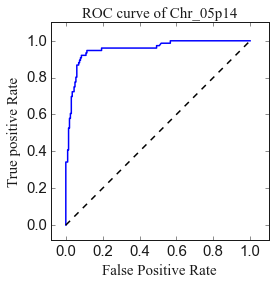

In [42]:
fig = plt.figure()
plt.style.use('classic')

ax = fig.add_subplot(111)

plt.plot(fpr, tpr, color='blue', linewidth=1.5)

plt.plot(x, y, '--', color='black', linewidth=1.5)

plt.title('ROC curve of Chr_05p14', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=15, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=15, fontname = 'Times New Roman')

ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)

plt.xticks(fontsize=15, fontname = 'Arial')
plt.yticks(fontsize=15, fontname = 'Arial')

plt.savefig('ROC_Curve_Combination.png', dpi=600)
plt.show()

#### 3.10.4.1 AUC Value

In [43]:
auc_value = auc(fpr, tpr)

In [44]:
print('AUC is ', auc_value)

AUC is  0.9541110238282272


# Results

In [45]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.913


In [46]:
print(performanceReport)

                    precision    recall  f1-score   support

            chr_05       0.94      0.95      0.94       201
chr_5_p14_deletion       0.85      0.83      0.84        76

         micro avg       0.91      0.91      0.91       277
         macro avg       0.89      0.89      0.89       277
      weighted avg       0.91      0.91      0.91       277



In [47]:
type(performanceReport)

str

In [48]:
print('AUC is ', auc_value)

AUC is  0.9541110238282272


## Export to a text file

In [49]:
file_report = open('ResultsCombination.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.write('Recall of Confusion Matrix: \n%s.\n\n' % confusion_r)
file_report.write('Precision of Confusion Matrix: \n%s.\n\n' % confusion_p)
file_report.close()

## Export ROC Parameters

In [50]:
with open('tpr_' + label_convert[1] + '.npy', 'wb') as file_tpr:
    np.save(file_tpr, np.array(tpr))
    
with open('fpr_' + label_convert[1] + '.npy', 'wb') as file_fpr:
    np.save(file_fpr, np.array(fpr))
    
with open('thresholds_' + label_convert[1] + '.npy', 'wb') as file_thresholds:
    np.save(file_thresholds, np.array(thresholds))